In [1]:
import numpy as np
import matplotlib.pyplot as plt
from evalf import evalf
from implicit_trap import trapezoidal
from scipy.integrate import odeint
from jacobian import calc_jac
from trapezoidalMatrixFree import trapezoidalMatrixFree
%load_ext autoreload
%autoreload 2

def better_imshow(row_vals, col_vals, data, ax=None):
    #row_vals and col_vals are the data that was swept over
    assert len(row_vals) == data.shape[0], 'length of row_vals does not match shape of data'
    assert len(col_vals) == data.shape[1], 'length of col_vals does not match shape of data'
    if ax == None:
        plt.imshow(data, origin='lower', extent=[col_vals[0], col_vals[-1], row_vals[0], row_vals[-1]], aspect='auto')
    else:
        ax.imshow(data, origin='lower', extent=[col_vals[0], col_vals[-1], row_vals[0], row_vals[-1]], aspect='auto')

In [ ]:

from newtonGCR import NewtonGCR
L_list = np.linspace(0,0.5, 50)
tlist = np.linspace(0,1e-7,100) 

S0 = 1 #initial supersaturation
V0 = 1 #initial volume
n0 = np.zeros_like(L_list) #initial population density distribution

#parameters
p = {"L_list" : L_list, #discretization bins
     'E' :  1e-7, #evaporation rate
     'V' : 1e-3, #solvent volume
     'rho' : 1200, # density of the crystal
     'k_v' : 1, #goes in N_C, volumetric shape factor
     'k_g' : 1e6, #growth rate constant m/s
     'g' : 3, #power constant for growth
     'k_N' : 1e5, #nucleation rate constant 
     'alpha' :5, #power constant for nucleation
     'Breakage': True, #toggle breakage for debug
     'weno': False  # use weno or not for differentiation w.r.t. L
     }


#integrate the equations
x0 = np.hstack([S0, V0, n0])
f = lambda x: evalf(x, None,p, None)
jf = lambda x: calc_jac(x, p, eps=1e-8)

e_f = 1e-8
e_delta_x = 1e-8
e_x_rel = 1e-8
maxiter = 100
t_start = 0 
t_end = 1e-7
alpha = 5e-3

t_len = len(tlist)
deltat = (tlist[1] - tlist[0])/2
t0 = tlist[1]
T = tlist[t_len-1]



# errf = 1e-5
errf = 1e-2
# errDeltax = 1e-4
errDeltax = 1e-2

errDeltax = 1e-8 ##
errf = 1e-8 ##
relDeltax = 1e-8##
MaxIter = 100 ##


tolrGCR    = 1e-2
epsMF      = 1e-2

evalf =  -np.arctan(x**2)*np.cos(x**2)



x,converged,errf_k,errDeltax_k,relDeltax_k,iterations,X= NewtonGCR(x0,evalf,p,errf,errDeltax,relDeltax,MaxIter,tolrGCR,epsMF)

#### Test Matrix Free Trapezoidal

In [2]:
from newtonGCR import NewtonGCR
from newton import newtonNd
from jacobian_HannahTest import calc_jac
L_list = np.linspace(0,0.5, 50)
tlist = np.linspace(0,1e-7,100) 

S0 = 1 #initial supersaturation
V0 = 1 #initial volume
n0 = np.zeros_like(L_list) #initial population density distribution

#parameters
p = {"L_list" : L_list, #discretization bins
     'E' :  1e-7, #evaporation rate
     'V' : 1e-3, #solvent volume
     'rho' : 1200, # density of the crystal
     'k_v' : 1, #goes in N_C, volumetric shape factor
     'k_g' : 1e6, #growth rate constant m/s
     'g' : 3, #power constant for growth
     'k_N' : 1e5, #nucleation rate constant 
     'alpha' :5, #power constant for nucleation
     'Breakage': True, #toggle breakage for debug
     'weno': False  # use weno or not for differentiation w.r.t. L
     }


#integrate the equations
x0 = np.hstack([S0, V0, n0])
f = lambda x: evalf(x, None,p, None)
jf = lambda x: calc_jac(x, p, eps=1e-8)

e_f = 1e-8
e_delta_x = 1e-8
e_x_rel = 1e-8
maxiter = 100
t_start = 0 
t_end = 1e-7
alpha = 5e-3

t_len = len(tlist)
deltat = (tlist[1] - tlist[0])/2
t0 = tlist[1]
T = tlist[t_len-1]



# errf = 1e-5
errf = 1e-2
# errDeltax = 1e-4
errDeltax = 1e-2

errDeltax = 1e-3 ##
errf = 1e-3 ##
relDeltax = 1e-3##
MaxIter = 100 ##

# tolrGCR    = 1e-5
# epsMF      = 1e-7
tolrGCR    = 1e-2
epsMF      = 1e-2

# e_f = 1e-8
# e_delta_x = 1e-8
# e_x_rel = 1e-8
# maxiter = 100
# t_start = 0 
# t_end = 1e-7
# alpha = 5e-3

def evalf(x,p):
    """
    dummy evalf to test NewtonGCR
    Inputs:
        x: x-values
        
        
    outputs:
        nonlinear output
    """
    
    # out = -np.arctan(x**2)*np.cos(x**2)-0.3
    # out = 3*x**3 -x 
    out = ((0.5*x-2)**2) -2
    # out =3
    return out
x0 =np.array([2,2])

# x0 =np.linspace(0,10,100)
# x_t= newtonNd(evalf, calc_jac, x0, errf, errDeltax, relDeltax, MaxIter)
x,converged,errf_k,errDeltax_k,relDeltax_k,iterations,X=NewtonGCR(x0,evalf,p,errf,errDeltax,relDeltax,MaxIter,tolrGCR,epsMF)
print("#########")

print(x[:,-1])   

type(x0) <class 'numpy.ndarray'>
final x  size in newton (2, 4)
type(x), output <class 'numpy.ndarray'>
Newton converged in iterations
 3
#########
[1.17156862 1.17156862]


In [3]:

np.linalg.norm([0],np.inf)

# print(type(x))
# print(len(x))
# print(x)
# print("##################")
# print(x[-1])

0.0

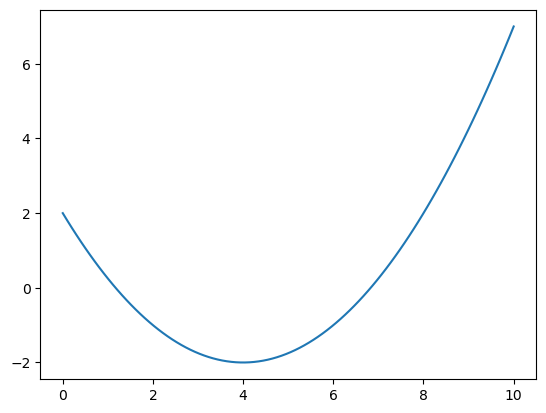

In [4]:
x =np.linspace(0,10,100)
out =3*(x-2)**2 -15 
out = -np.arctan(x**2)*np.cos(x**2)-0.3
out = ((0.5*x-2)**2) -2
# plt.xlim([-10,300])
plt.plot(x,out)

In [2]:
from evalf import evalf
L_list = np.linspace(0,0.5, 500)
tlist = np.linspace(0,1e-5,100) 

S0 = 1 #initial supersaturation
V0 = 1 #initial volume
n0 = np.zeros_like(L_list) #initial population density distribution

#parameters
p = {"L_list" : L_list, #discretization bins
     'E' :  1e-7, #evaporation rate
     'V' : 1e-3, #solvent volume
     'rho' : 1200, # density of the crystal
     'k_v' : 1, #goes in N_C, volumetric shape factor
     'k_g' : 1e6, #growth rate constant m/s
     'g' : 3, #power constant for growth
     'k_N' : 1e5, #nucleation rate constant 
     'alpha' :5, #power constant for nucleation
     'Breakage': True, #toggle breakage for debug
     'weno': False  # use weno or not for differentiation w.r.t. L
     }


#integrate the equations
x0 = np.hstack([S0, V0, n0])
f = lambda x: evalf(x, None,p, None)
jf = lambda x: calc_jac(x, p, eps=1e-8)

e_f = 1e-8
e_delta_x = 1e-8
e_x_rel = 1e-8
maxiter = 100
t_start = 0 
t_end = 1e-7
alpha = 5e-3

t_len = len(tlist)
deltat = (tlist[1] - tlist[0])/2
t0 = tlist[1]
T = tlist[t_len-1]



# errf = 1e-5
errf = 1e-2
# errDeltax = 1e-4
errDeltax = 1e-2

errDeltax = 1e-2 ##
errf = 1e-2 ##
relDeltax = 1e-2##
MaxIter = 100 ##

# tolrGCR    = 1e-5
# epsMF      = 1e-7
tolrGCR    = 1e-2
epsMF      = 1e-2

# e_f = 1e-8
# e_delta_x = 1e-8
# e_x_rel = 1e-8
# maxiter = 100
# t_start = 0 
# t_end = 1e-7
# alpha = 5e-3
x_t=trapezoidalMatrixFree( evalf,x0, deltat, t0, T, p, errf, errDeltax, relDeltax, MaxIter,tolrGCR,epsMF)
## Note: sometimes does not converge when dL is not small enough
     

t 1.0101010101010101e-07
type(x0) <class 'numpy.ndarray'>
final x  size in newton (502, 101)
type(x), output <class 'numpy.ndarray'>
errf_k 30513.688194407663
errDeltax_k 4.268098730401167e-21
relDeltax_k 4.268098730401166e-21
Newton did NOT converge! Maximum Number of Iterations reached

x_next.shape (502, 101)
t 1.5151515151515152e-07
type(x0) <class 'numpy.ndarray'>
final x  size in newton (502, 101)
type(x), output <class 'numpy.ndarray'>
errf_k 30513.688194407667
errDeltax_k 9.5148697811491e-22
relDeltax_k 9.514869781149099e-22
Newton did NOT converge! Maximum Number of Iterations reached

x_next.shape (502, 101)
t 2.0202020202020202e-07
type(x0) <class 'numpy.ndarray'>
final x  size in newton (502, 101)
type(x), output <class 'numpy.ndarray'>
errf_k 30513.688194407667
errDeltax_k 8.971162936512008e-22
relDeltax_k 8.971162936512007e-22
Newton did NOT converge! Maximum Number of Iterations reached

x_next.shape (502, 101)
t 2.525252525252525e-07
type(x0) <class 'numpy.ndarray'>
fin

KeyboardInterrupt: 

In [26]:
x_t =np.array(x_t)

print(x_t.shape)

(1998, 52)


#### Plot Results

ValueError: x and y must have same first dimension, but have shapes (1000,) and (1998,)

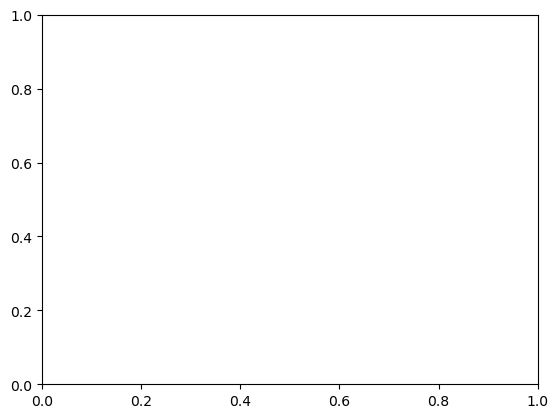

In [27]:
plt.plot(tlist,  x_t[:,0]) 
plt.title('supersaturation')
plt.xlabel('t')
plt.show()

#### Test Implicit Trapezoidal 

In [ ]:
L_list = np.linspace(0,0.5, 50)
tlist = np.linspace(0,1,100) 

S0 = 1 #initial supersaturation
V0 = 1 #initial volume
n0 = np.zeros_like(L_list) #initial population density distribution

#parameters
p = {"L_list" : L_list, #discretization bins
     'E' :  1e-7, #evaporation rate
     'V' : 1e-3, #solvent volume
     'rho' : 1200, # density of the crystal
     'k_v' : 1, #goes in N_C, volumetric shape factor
     'k_g' : 1e6, #growth rate constant m/s
     'g' : 3, #power constant for growth
     'k_N' : 1e5, #nucleation rate constant 
     'alpha' :5, #power constant for nucleation
     'Breakage': True, #toggle breakage for debug
     'weno': True  # use weno or not for differentiation w.r.t. L
     }


#integrate the equations
x0 = np.hstack([S0, V0, n0])
f = lambda x: evalf(x, None,p, None)
jf = lambda x: calc_jac(x, p, eps=1e-8)

e_f = 1e-8
e_delta_x = 1e-8
e_x_rel = 1e-8
maxiter = 100
t_start = 0 
t_end = 1e-7
alpha = 5e-3

x_t, tlist = trapezoidal(f, x0, t_start, t_end, alpha, jf, e_f, e_delta_x, e_x_rel, maxiter)

TypeError: evalf() takes 2 positional arguments but 4 were given

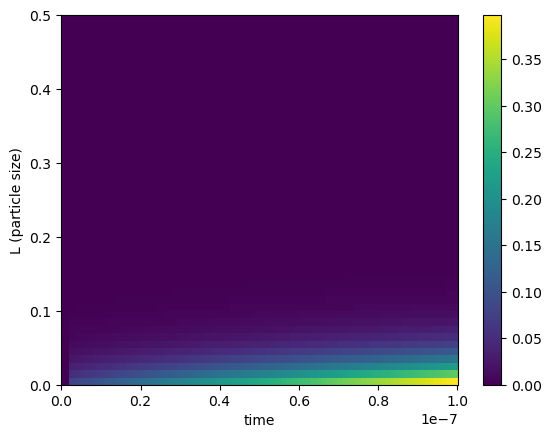

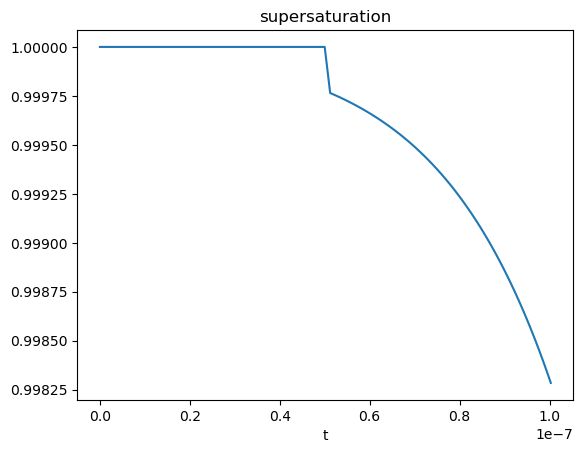

Text(0.5, 0, 't')

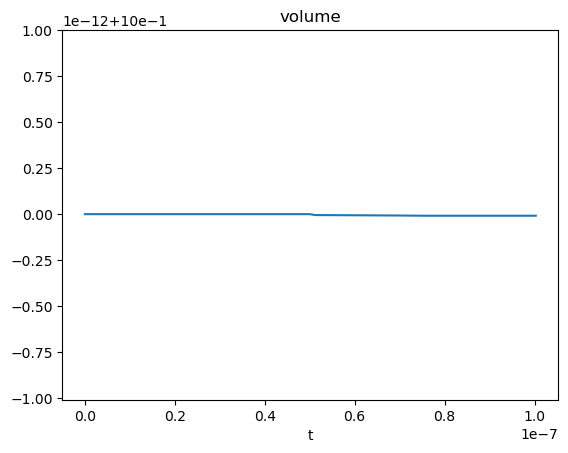

In [ ]:
#plot results
x_t = np.array(x_t)
n_t = x_t[:,2:]
x_ref = x_t[-1,2:] #reference for analysis below
better_imshow(L_list, tlist, n_t.T)
plt.ylabel('L (particle size)')
plt.xlabel('time')
plt.colorbar()
plt.show()

plt.plot(tlist, x_t[:,0]) 
plt.title('supersaturation')
plt.xlabel('t')
plt.show()

plt.plot(tlist, x_t[:,1]) 
plt.title('volume')
plt.xlabel('t')

In [ ]:
len(tlist)

99

Testing alpha values

In [ ]:
t_end = 1e-5
alpha = 1e-1
x_t, tlist = trapezoidal(f, x0, t_start, t_end, alpha, jf, e_f, e_delta_x, e_x_rel, maxiter)


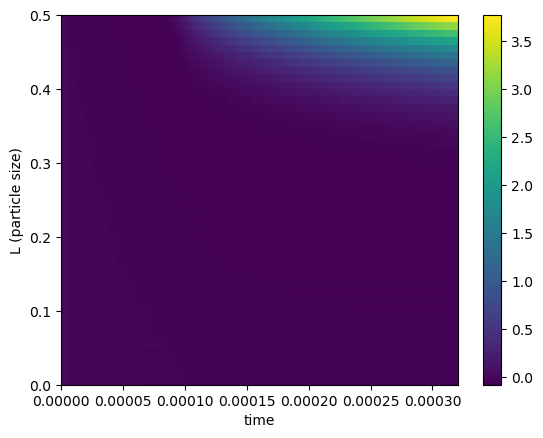

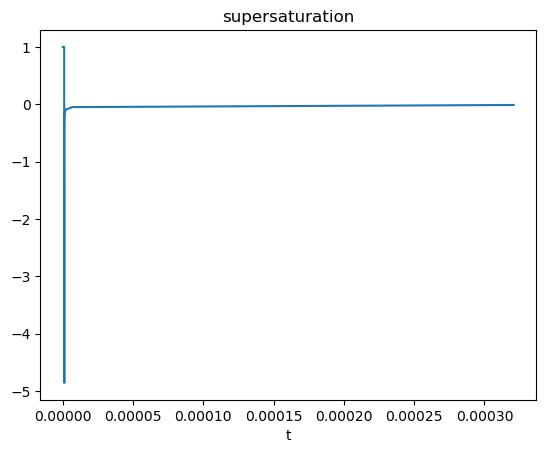

Text(0.5, 0, 't')

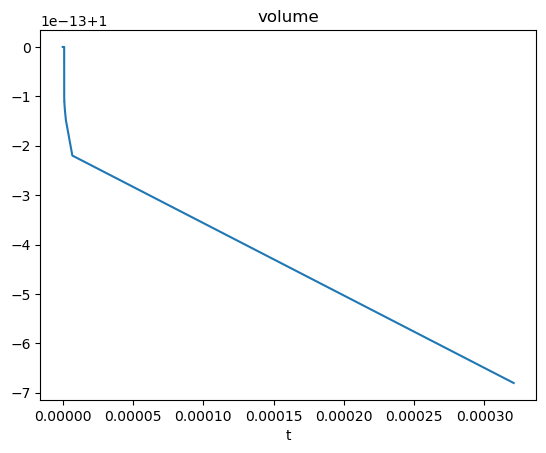

In [ ]:
#plot results
x_t = np.array(x_t)
n_t = x_t[:,2:]
x_ref = x_t[-1,2:] #reference for analysis below
better_imshow(L_list, tlist, n_t.T)
plt.ylabel('L (particle size)')
plt.xlabel('time')
plt.colorbar()
plt.show()

plt.plot(tlist, x_t[:,0]) 
plt.title('supersaturation')
plt.xlabel('t')
plt.show()

plt.plot(tlist, x_t[:,1]) 
plt.title('volume')
plt.xlabel('t')